In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [4]:
import pooch

doi = "doi:10.5281/zenodo.5739406"
fname = "wind_po_hrly.csv"
file_path = pooch.retrieve(
    url = f"{doi}/{fname}",
    known_hash= "md5:cf059b73d6831282c5580776ac07309a",
)
file_path
data=pd.read_csv(file_path)

In [5]:
data['time'] = pd.to_datetime(data['date.time'])
df = data.set_index('time')
del df['date.time']
df

,ny_1_onshore,ny_2_onshore,newe_onshore,mw_onshore,newe_offshore,ny_offshore,rfce_offshore,srvc_offshore
time,,,,,,,,
2011-01-01 00:00:00,0.725240,0.450004,0.693996,0.646463,0.759451,0.528019,0.353946,0.189323
2011-01-01 01:00:00,0.702001,0.446462,0.677913,0.688890,0.767231,0.530822,0.357297,0.212965
2011-01-01 02:00:00,0.670164,0.432219,0.645567,0.717634,0.764237,0.538845,0.374450,0.232722
2011-01-01 03:00:00,0.627149,0.436257,0.608017,0.745687,0.760258,0.541974,0.387670,0.246672
2011-01-01 04:00:00,0.580882,0.456108,0.584728,0.767698,0.759814,0.552363,0.393835,0.261140
...,...,...,...,...,...,...,...,...
2011-12-31 19:00:00,0.150045,0.082391,0.088865,0.720539,0.476383,0.163698,0.372314,0.560770
2011-12-31 20:00:00,0.195011,0.149053,0.108974,0.726394,0.361439,0.231603,0.452929,0.531400
2011-12-31 21:00:00,0.233575,0.247808,0.179469,0.762285,0.323750,0.362382,0.598099,0.516109


In [4]:
ds = df.to_xarray()
df

,ny_1_onshore,ny_2_onshore,newe_onshore,mw_onshore,newe_offshore,ny_offshore,rfce_offshore,srvc_offshore
time,,,,,,,,
2011-01-01 00:00:00,0.725240,0.450004,0.693996,0.646463,0.759451,0.528019,0.353946,0.189323
2011-01-01 01:00:00,0.702001,0.446462,0.677913,0.688890,0.767231,0.530822,0.357297,0.212965
2011-01-01 02:00:00,0.670164,0.432219,0.645567,0.717634,0.764237,0.538845,0.374450,0.232722
2011-01-01 03:00:00,0.627149,0.436257,0.608017,0.745687,0.760258,0.541974,0.387670,0.246672
2011-01-01 04:00:00,0.580882,0.456108,0.584728,0.767698,0.759814,0.552363,0.393835,0.261140
...,...,...,...,...,...,...,...,...
2011-12-31 19:00:00,0.150045,0.082391,0.088865,0.720539,0.476383,0.163698,0.372314,0.560770
2011-12-31 20:00:00,0.195011,0.149053,0.108974,0.726394,0.361439,0.231603,0.452929,0.531400
2011-12-31 21:00:00,0.233575,0.247808,0.179469,0.762285,0.323750,0.362382,0.598099,0.516109


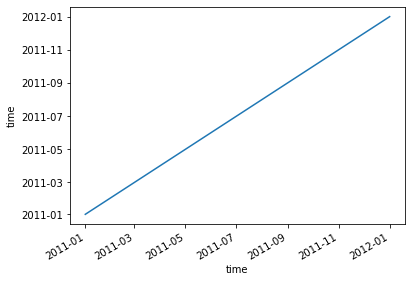

In [5]:
ds.time.plot()

In [6]:
ds

<xarray.Dataset>
Dimensions:        (time: 8760)
Coordinates:
  * time           (time) datetime64[ns] 2011-01-01 ... 2011-12-31T23:00:00
Data variables:
    ny_1_onshore   (time) float64 0.7252 0.702 0.6702 ... 0.2336 0.2565 0.2531
    ny_2_onshore   (time) float64 0.45 0.4465 0.4322 ... 0.2478 0.3082 0.3699
    newe_onshore   (time) float64 0.694 0.6779 0.6456 ... 0.1795 0.2908 0.3868
    mw_onshore     (time) float64 0.6465 0.6889 0.7176 ... 0.7623 0.8226 0.8802
    newe_offshore  (time) float64 0.7595 0.7672 0.7642 ... 0.3237 0.3145 0.4689
    ny_offshore    (time) float64 0.528 0.5308 0.5388 ... 0.3624 0.5067 0.6776
    rfce_offshore  (time) float64 0.3539 0.3573 0.3744 ... 0.5981 0.7545 0.7837
    srvc_offshore  (time) float64 0.1893 0.213 0.2327 ... 0.5161 0.5112 0.4739

In [30]:
ds.mean()
ds['site1234']= 0.25*(ds.ny_1_onshore.mean()+ds.ny_2_onshore.mean()+ds.newe_onshore.mean()+ds.mw_onshore.mean())
ds['site1256']= 0.25*(ds.ny_1_onshore.mean()+ds.ny_2_onshore.mean()+ds.newe_offshore.mean()+ds.ny_offshore.mean())
ds['site5678']= 0.25*(ds.newe_offshore.mean()+ds.ny_offshore.mean()+ds.rfce_offshore.mean()+ds.srvc_offshore.mean())
ds['all_sites']= 0.125*(ds.ny_1_onshore.mean()+ds.ny_2_onshore.mean()+ds.newe_onshore.mean()+ds.mw_onshore.mean()+ds.newe_offshore.mean()+ds.ny_offshore.mean()+ds.rfce_offshore.mean()+ds.srvc_offshore.mean())
ds

<xarray.Dataset>
Dimensions:        (time: 8760)
Coordinates:
  * time           (time) datetime64[ns] 2011-01-01 ... 2011-12-31T23:00:00
Data variables:
    ny_1_onshore   (time) float64 0.7252 0.702 0.6702 ... 0.2336 0.2565 0.2531
    ny_2_onshore   (time) float64 0.45 0.4465 0.4322 ... 0.2478 0.3082 0.3699
    newe_onshore   (time) float64 0.694 0.6779 0.6456 ... 0.1795 0.2908 0.3868
    mw_onshore     (time) float64 0.6465 0.6889 0.7176 ... 0.7623 0.8226 0.8802
    newe_offshore  (time) float64 0.7595 0.7672 0.7642 ... 0.3237 0.3145 0.4689
    ny_offshore    (time) float64 0.528 0.5308 0.5388 ... 0.3624 0.5067 0.6776
    rfce_offshore  (time) float64 0.3539 0.3573 0.3744 ... 0.5981 0.7545 0.7837
    srvc_offshore  (time) float64 0.1893 0.213 0.2327 ... 0.5161 0.5112 0.4739
    site1234       float64 0.377
    site1256       float64 0.4103
    site5678       float64 0.499
    all_sites      float64 0.438

ds.time.sel(time=slice('2011-12-01', '2011-12-31'))

In [8]:
ds_roll = ds.roll(time=744)
ds_roll

/tmp/ipykernel_917/3418031439.py:1: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds_roll = ds.roll(time=744)


<xarray.Dataset>
Dimensions:        (time: 8760)
Coordinates:
  * time           (time) datetime64[ns] 2011-12-01 ... 2011-11-30T23:00:00
Data variables:
    ny_1_onshore   (time) float64 0.6274 0.5917 0.5397 ... 0.5653 0.6321 0.6367
    ny_2_onshore   (time) float64 0.6412 0.6872 0.7353 ... 0.4114 0.5167 0.594
    newe_onshore   (time) float64 0.8042 0.7945 0.7983 ... 0.7274 0.7724 0.7984
    mw_onshore     (time) float64 0.6889 0.7087 0.7078 ... 0.4231 0.5308 0.6441
    newe_offshore  (time) float64 0.9086 0.8756 0.8384 ... 0.9378 0.9244 0.9161
    ny_offshore    (time) float64 0.9411 0.9351 0.9123 ... 0.8389 0.9112 0.9429
    rfce_offshore  (time) float64 0.9215 0.9493 0.9656 ... 0.7156 0.8193 0.8831
    srvc_offshore  (time) float64 0.632 0.6556 0.6886 ... 0.4921 0.5519 0.6086

In [22]:
turbine_power = [2,2,2,2,6,6,6,6]
ds.rename_vars({'ny_1_onshore'}'site1')

TypeError: rename_vars() takes from 1 to 2 positional arguments but 3 were given

In [10]:
ds.ny_1_onshore * turbine_power[0] * 16883.76

<xarray.DataArray 'ny_1_onshore' (time: 8760)>
array([24489.57291972, 23704.84253257, 22629.76776386, ...,
        7887.24210194,  8660.0906443 ,  8546.53868005])
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 ... 2011-12-31T23:00:00

In [11]:
djf = ds.isel(time=ds.time.dt.month.isin([12,1,2]))
mam = ds.isel(time=ds.time.dt.month.isin([3,4,5]))
jja = ds.isel(time=ds.time.dt.month.isin([6,7,8]))
son = ds.isel(time=ds.time.dt.month.isin([9,10,11]))

In [12]:
djf.mean('time')/(djf.mean()+mam.mean()+jja.mean()+son.mean())

<xarray.Dataset>
Dimensions:        ()
Data variables:
    ny_1_onshore   float64 0.2946
    ny_2_onshore   float64 0.2935
    newe_onshore   float64 0.2812
    mw_onshore     float64 0.267
    newe_offshore  float64 0.2752
    ny_offshore    float64 0.2743
    rfce_offshore  float64 0.2864
    srvc_offshore  float64 0.2861

In [13]:
mam.mean('time')/(djf.mean()+mam.mean()+jja.mean()+son.mean())

<xarray.Dataset>
Dimensions:        ()
Data variables:
    ny_1_onshore   float64 0.2855
    ny_2_onshore   float64 0.3149
    newe_onshore   float64 0.2862
    mw_onshore     float64 0.2709
    newe_offshore  float64 0.2863
    ny_offshore    float64 0.2917
    rfce_offshore  float64 0.306
    srvc_offshore  float64 0.2767

In [14]:
jja.mean('time')/(djf.mean()+mam.mean()+jja.mean()+son.mean())

<xarray.Dataset>
Dimensions:        ()
Data variables:
    ny_1_onshore   float64 0.1549
    ny_2_onshore   float64 0.1575
    newe_onshore   float64 0.1815
    mw_onshore     float64 0.2045
    newe_offshore  float64 0.189
    ny_offshore    float64 0.1847
    rfce_offshore  float64 0.1657
    srvc_offshore  float64 0.1936

In [15]:
son.mean('time')/(djf.mean()+mam.mean()+jja.mean()+son.mean())

<xarray.Dataset>
Dimensions:        ()
Data variables:
    ny_1_onshore   float64 0.2651
    ny_2_onshore   float64 0.234
    newe_onshore   float64 0.2512
    mw_onshore     float64 0.2575
    newe_offshore  float64 0.2495
    ny_offshore    float64 0.2492
    rfce_offshore  float64 0.2419
    srvc_offshore  float64 0.2436

In [16]:
djf.mean('time')/(ds.mean('time'))

<xarray.Dataset>
Dimensions:        ()
Data variables:
    ny_1_onshore   float64 1.18
    ny_2_onshore   float64 1.175
    newe_onshore   float64 1.125
    mw_onshore     float64 1.069
    newe_offshore  float64 1.101
    ny_offshore    float64 1.098
    rfce_offshore  float64 1.146
    srvc_offshore  float64 1.145

In [17]:
mam.mean('time')

<xarray.Dataset>
Dimensions:        ()
Data variables:
    ny_1_onshore   float64 0.3386
    ny_2_onshore   float64 0.3773
    newe_onshore   float64 0.5214
    mw_onshore     float64 0.4958
    newe_offshore  float64 0.6294
    ny_offshore    float64 0.5796
    rfce_offshore  float64 0.5742
    srvc_offshore  float64 0.5334

In [18]:
jja.mean()

<xarray.Dataset>
Dimensions:        ()
Data variables:
    ny_1_onshore   float64 0.1837
    ny_2_onshore   float64 0.1888
    newe_onshore   float64 0.3306
    mw_onshore     float64 0.3744
    newe_offshore  float64 0.4156
    ny_offshore    float64 0.367
    rfce_offshore  float64 0.311
    srvc_offshore  float64 0.3732

In [19]:
son.mean()

<xarray.Dataset>
Dimensions:        ()
Data variables:
    ny_1_onshore   float64 0.3143
    ny_2_onshore   float64 0.2804
    newe_onshore   float64 0.4577
    mw_onshore     float64 0.4714
    newe_offshore  float64 0.5484
    ny_offshore    float64 0.4952
    rfce_offshore  float64 0.4541
    srvc_offshore  float64 0.4697

In [26]:
site

Index(['ny_1_onshore', 'ny_2_onshore', 'newe_onshore', 'mw_onshore',
       'newe_offshore', 'ny_offshore', 'rfce_offshore', 'srvc_offshore'],
      dtype='object')

In [18]:
cp_data

,ny_2_onshore,newe_onshore,mw_onshore,newe_offshore,ny_offshore,rfce_offshore,srvc_offshore
time,,,,,,,
2011-01-01 00:00:00,0.450004,0.693996,0.646463,0.759451,0.528019,0.353946,0.189323
2011-01-01 01:00:00,0.446462,0.677913,0.688890,0.767231,0.530822,0.357297,0.212965
2011-01-01 02:00:00,0.432219,0.645567,0.717634,0.764237,0.538845,0.374450,0.232722
2011-01-01 03:00:00,0.436257,0.608017,0.745687,0.760258,0.541974,0.387670,0.246672
2011-01-01 04:00:00,0.456108,0.584728,0.767698,0.759814,0.552363,0.393835,0.261140
...,...,...,...,...,...,...,...
2011-12-31 19:00:00,0.082391,0.088865,0.720539,0.476383,0.163698,0.372314,0.560770
2011-12-31 20:00:00,0.149053,0.108974,0.726394,0.361439,0.231603,0.452929,0.531400
2011-12-31 21:00:00,0.247808,0.179469,0.762285,0.323750,0.362382,0.598099,0.516109


In [27]:
time = df.index
site = df.columns[0:]

da_cf = xr.Dataset(data_vars={
    'capacity_factor':(['time','site'],df)}
                  )
da_cf

<xarray.Dataset>
Dimensions:          (time: 8760, site: 8)
Dimensions without coordinates: time, site
Data variables:
    capacity_factor  (time, site) float64 0.7252 0.45 0.694 ... 0.7837 0.4739

In [21]:
time = data['date.time']
site = data.columns[1:]
cp_data=data.iloc[:,1:]

In [ ]:
da_cf = xr.DataArray(data = cp_data, dims = ['time','site'],coords={'time':time,'site':site},name="capacity factor")
da_cf

In [ ]:
da_cf.mean(dim='time')

In [ ]:
dec = da_cf.sel(time=slice('12/1/2011 0:00','12/31/2011 23:00'))
jan = da_cf.sel(time=slice('1/1/2011 0:00','1/31/2011 23:00'))
feb = da_cf.sel(time=slice('2/1/2011 0:00','2/28/2011 23:00'))
mar = da_cf.sel(time=slice('3/1/2011 0:00','3/31/2011 23:00'))
apr = da_cf.sel(time=slice('4/1/2011 0:00','4/30/2011 23:00'))
may = da_cf.sel(time=slice('5/1/2011 0:00','5/31/2011 23:00'))
jun = da_cf.sel(time=slice('6/1/2011 0:00','6/30/2011 23:00'))
jul = da_cf.sel(time=slice('7/1/2011 0:00','7/31/2011 23:00'))
aug = da_cf.sel(time=slice('8/1/2011 0:00','8/31/2011 23:00'))
sep = da_cf.sel(time=slice('9/1/2011 0:00','9/30/2011 23:00'))
oct = da_cf.sel(time=slice('10/1/2011 0:00','10/31/2011 23:00'))
nov = da_cf.sel(time=slice('11/1/2011 0:00','11/30/2011 23:00'))

In [ ]:
djf = xr.concat([dec,jan,feb],dim='time')
mam = da_cf.sel(time=slice('3/1/2011 0:00','5/31/2011 23:00'))
jja = da_cf.sel(time=slice('5/1/2011 0:00','7/31/2011 23:00'))
son = da_cf.sel(time=slice('9/1/2011 0:00','11/30/2011 23:00')) 

In [ ]:
djf = []
for i in range (len(site)):
    

In [ ]:
jdf.mean(dim='time')

In [ ]:
locations =  data.columns[1:]
turbine_power = [2,2,2,2,6,6,6,6]

number_of_turbines = []
for i in range(len(locations)):
    number_of_turbines.append(10000/(data[locations[i]].mean()*turbine_power[i]))
    print("Number of turbine for 10 GW for site",i+1,"is:","%.2f" % number_of_turbines[i])
    
locations =  data.columns[1:]
hourly_energy_generation = []
for i in range(len(locations)):
    hourly_energy_generation.append(number_of_turbines[i]*data[locations[i]]*turbine_power[i])
    print(hourly_energy_generation)


In [ ]:
power_generation = xr.DataArray(data = hourly_energy_generation, dims= ['time','site']
                                ,name="annual power generation",coords = {'time':time})
power_generation